### 매개변수 갱신

### 확률적 경사 하강법(SGD)

$W\leftarrow W-\eta\frac{\partial{L}}{\partial{W}}$  
  
- W : 갱신할 가중치 매개변수  
- $\frac{\partial{L}}{\partial{W}}$ : W에 대한 손실 함수의 기울기  
- $\eta$ : 학습률
- $\leftarrow$ : 우변의 값으로 좌변의 값을 갱신한다는 의미  


SGD는 기울어진 방향으로 일정 거리만 가겠다는 단순한 방법

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

SGD 클래스를 사용하면 신경망 매개변수의 진행을 다음과 같이 수행

~~~python
network = TwoLayerNet(...)
optimizer = SGD()

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...
~~~

여기서, optimizer : '최적화를 행하는 자'라는 뜻으로 SGD가 그 역할(매개변수 갱신)을 수행  
optimizer에 매개변수와 기울기 정보만 넘겨주면 됨

### SGD의 단점

SGD는 단순하고 구현도 쉽지만, 문제에 따라서는 비효율적일 때가 있음  

ex)
$f(x,y)=\frac{1}{20}x^2+y^2$

<img src='./img/SGD_1.png' width=500>

함수의 기울기를 그려보면, 기울기가 y축 방향은 크고 x축 방향은 작음  
    최솟값이 되는 장소는 (x,y)=(0,0)이지만, 기울기 대부분은 (0,0) 방향을 가리키지 않음

<img src='./img/SGD_2.png' width=400>

위 함수에 SGD를 적용  
탐색을 시작하는 장소(초깃값)는 (x,y)=(-7.0,2.0)으로 하면,

<img src='./img/SGD_3.png' width=500>

심하게 굽이진 비효율적인 움직임을 보임  
  
SGD의 단점은 비등방성(anisotropy) 함수(방향에 따라 성질, 즉 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적임  
이런 경우에는 SGD 같이 무작정 기울어진 방향으로 진행하는 단순한 방식보다 다른 묘안이 필요함  

### 모멘텀(Momentum)

모멘텀 : '운동량'을 뜻하는 단어  
  
$v\leftarrow \alpha v-\eta\frac{\partial{L}}{\partial{W}}$  
$W\leftarrow W+v$  
  
- W : 갱신할 가중치 매개변수  
- $\frac{\partial{L}}{\partial{W}}$ : W에 대한 손실 함수의 기울기
- $\eta$ : 학습률
- $v$ : 속도  
- $\alpha v$ : 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 함  
    ($\alpha$는 0.9 등의 값으로 설정함)
  
위 식에서 첫 번째 식은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타냄  
모멘텀은 아래 그림과 같이 공이 바닥을 구르는 듯한 움직임을 보여줌

<img src='./img/momentum_1.png' width=500>

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
            for key in params.keys():
                self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
                params[key] += self.v[key]

v는 초기화 대는 아무 값도 담지 않고, 대신 update()가 처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장함

모멘텀을 사용해서 $f(x,y)=\frac{1}{20}x^2+y^2$의 최적화 문제를 풀면 다음과 같이 됨

<img src='./img/momentum_2.png' width=500>

SGD와 비교하면 '지그재그 정도'가 덜한 것을 알 수 있음  
x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문  
거꾸로 y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않음  
전체적으로 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어듬

### AdaGrad

신경망 학습에서는 학습률($\eta$) 값이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하여 학습이 제대로 이뤄지지 않음  
  
합습률 감소(learning rate decay) : 학습을 진행하면서 학습률을 점차 줄여가는 방법,  
처음에는 크게 학습하다가 조금씩 작게 학습  
  
AdaGrad는 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행함  
  
$h \leftarrow h+\frac{\partial{L}}{\partial{W}}	\odot \frac{\partial{L}}{\partial{W}}$  

$W \leftarrow W-\eta\frac{1}{\sqrt{h}}\frac{\partial{L}}{\partial{W}}$  
  
- W : 갱신할 가중치 매개변수  
- $\frac{\partial{L}}{\partial{W}}$ : W에 대한 손실 함수의 기울기
- $\eta$ : 학습률
- h : 기존 기울기 값을 제곱하여 계속 더해줌($\odot$기호는 행렬의 원소별 곱셈을 의미),  
    그리고 매개변수를 갱신할 때 $\frac{1}{\sqrt{h}}$을 곱해 학습률을 조정함  
    매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻  
    다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻함

<참고>  
AdaGrad는 과거의 기울기를 제곱하여 계속 더해감  
따라서 학습을 진행할수록 갱신 강도가 약해짐  
실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 전혀 갱신이 되지 않음  
이 문제를 개선한 기법으로 RMSProp이 있음  
RMSProp은 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영함  
이를 지수이동평균(Exponential Moving Average, EMA)라 하여, 과거 기울기의 반영 규모를 기하급수적으로 감소시킴

In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

마지막 줄에서 1e-7이라는 작은 값을 더하는 부분 : self.h[key]에 0이 담겨 있다 해도 0으로 나누는 사태를 막아줌

AdaGrad 사용해서 $f(x,y)=\frac{1}{20}x^2+y^2$의 최적화 문제를 풀면 다음과 같이 됨

<img src='./img/AdaGrad_1.png' width=500>

최솟값을 향해 효율적으로 움직임  
y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도로 큰 폭으로 작아지도록 조정됨  
따라서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어듬

### Adam

모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보임  
AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했음  
이 두 기법을 융합한 듯한 방법이 Adam  
또, 하이퍼파라미터의 '편향 보정'이 진행된다는 특징도 있음

In [4]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

Adam을 사용해서 $f(x,y)=\frac{1}{20}x^2+y^2$의 최적화 문제를 풀면 다음과 같이 됨

<img src='./img/Adam_1.png' width=500>

모멘텀과 비슷한 패턴, 모멘텀보다 공의 좌우 흔들림이 적음  
학습의 갱신 강도를 적응적으로 조정했기 때문  
  
Adam은 하이퍼파라미터를 3개 설정
1. 학습률(논문에서는 $\alpha$로 표기)
2. 모멘텀용 계수 $\beta_1$ (기본 설정값 : 0.9)
3. 이차 모멘텀용 계수 $\beta_2$ (기본 설정값 : 0.999)

### 매개변수의 갱신 방법 4개 비교

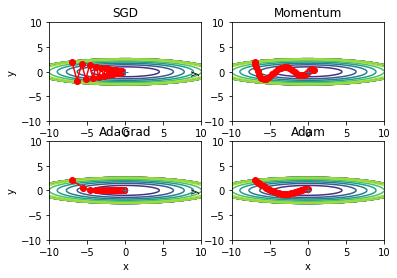

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

위 그림만 보면 AdaGrad가 가장 나은 것 같지만,  
결과는 풀어야 할 문제가 무엇이냐에 따라 달라짐
추가로 (학습률 등의) 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 바뀜  
모든 문제에서 항상 뛰어난 기법은 (아직까진) 없음  
상황에 맞게 선택해서 사용해야 함

### MNIST 데이터셋으로 본 갱신 방법 비교

각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용함  
 

===========iteration:0===========
SGD:2.3615886063653964
Momentum:2.4020289654665703
AdaGrad:2.1970852243860115
Adam:2.234178470664596
RMSprop:12.970030074599219
===========iteration:100===========
SGD:1.5023677645495694
Momentum:0.4753452507710533
AdaGrad:0.17764676658298761
Adam:0.34874157655368165
RMSprop:0.3549203614546782
===========iteration:200===========
SGD:0.8607512171814771
Momentum:0.27555509584773613
AdaGrad:0.11148657178203314
Adam:0.1913248494403973
RMSprop:0.24073313512426958
===========iteration:300===========
SGD:0.5467047118537058
Momentum:0.17267949507498098
AdaGrad:0.06541109458207664
Adam:0.1339286410618804
RMSprop:0.11188883817526375
===========iteration:400===========
SGD:0.39634299294873865
Momentum:0.1494451305654193
AdaGrad:0.05091132120981855
Adam:0.09707347323426566
RMSprop:0.05403454224283782
===========iteration:500===========
SGD:0.3886016897784734
Momentum:0.14621752520358605
AdaGrad:0.07460357117589206
Adam:0.12970831956835102
RMSprop:0.409185287783281

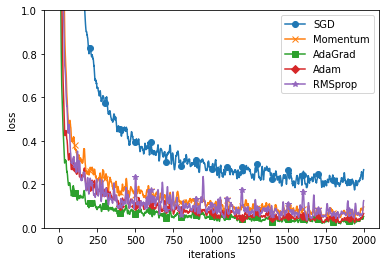

In [6]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []     


# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D", "RMSprop": "*"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

그래프의 결과를 보면 SGD의 학습 진도가 가장 느림  
나머지 기법들의 진도는 비슷한데, AdaGrad가 조금 더 빠름  
이 실험에서 주의할 점은 하이퍼파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과가 달라진다는 것  

### 가중치의 초깃값

가중치 감소(weight decay) : 오버피팅을 억제해 범용 성능을 높이는 테크닉,  
가중치 매개변수의 값이 작아지도록 학습하는 방법  
가중치 값을 작게 하여 오버피팅이 일어나지 않게 함
  
가중치를 작게 만들기 위해 초깃값도 최대한 작은 값에서 시작  
  
이 때 만약, 초깃값을 모두 0으로 하게 된다면?  
오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문에 가중치를 균일한 값으로 설정해서는 안됨  
초깃값을 무작위로 설정해야 함

### 은닉층의 활성화값 분포

활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 확인

분포된 정도(표준편차)를 바꿔가며 활성화값들의 분포가 어떻게 변화하는지 관찰하는 것이 이 실험의 목적

##### 1. 표준편차 1인 정규분포

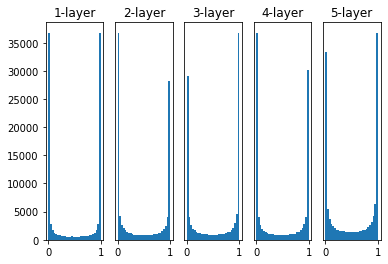

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있음  
  
여기서 사용한 시그모이드 함수는 그 출력이 0에 가까워지자(또는 1에 가까워지자) 그 미분은 0에 다가감  
그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라짐  
이것을 __기울기 소실(gradient vanishing)__ 문제라고 함

##### 2. 표준편차 0.01

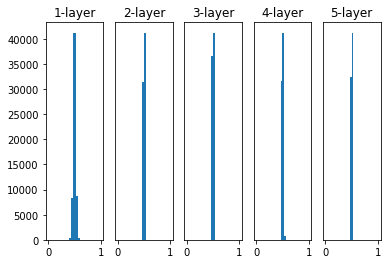

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

이번에는 0.5 부근에 집중되어 있음  
앞의 예처럼 0과 1로 치우치지 않아 기울기 문제는 일어나지 않지만,  
활성화값들이 치우쳐 다수의 뉴런이 거의 같은 값을 출력하므로 뉴련을 여러 개 둔 의미가 없어짐  
그러므로 활성화값들이 치우치면 표현력을 제한한다는 관점에서 문제가 됨

각 층의 활성화값은 적당히 고루 분포되어야 함  
층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이뤄짐

##### 3. Xavier 초깃값

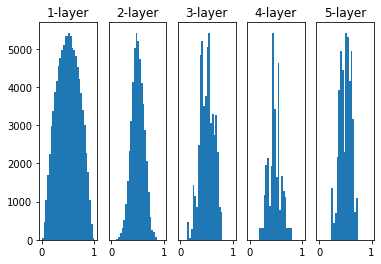

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Xavier 초깃값 : 사비에르 글로로트와 요슈아 벤지오의 논문에서 권장하는 가중치 초깃값  
일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있음  
  
앞 계층의 노드가 n개라면 초깃값의 표준편차가 $\frac{1}{\sqrt{n}}$인 분포를 사용  
  
Xavier 초깃값을 사용하면 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 퍼짐  
  
위 그래프의 결과를 보면, 층이 깊어지면서 형태가 다소 일그러지지만, 앞에서 본 방식보다는 확실히 넓게 분포됨을 알 수 있음  
각 층에 흐르는 데이터가 적당히 퍼져있으므로, 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이뤄질 것으로 기대됨

<참고>  
위 그래프는 오른쪽으로 갈수록 약간씩 일그러지고 있음  
이 일그러짐은 sigmoid함수 대신 tanh함수(쌍곡선 함수)를 이용하면 개선됨  
tanh 함수는 원점(0,0)에서 대칭인 S 곡선인 반면,  
sigmoid 함수는 (x,y)=(0,0.5)에서 대칭인 S 곡선  
활성화 함수용으로는 원점에서 대칭인 함수가 바람직하도 알려져 있음

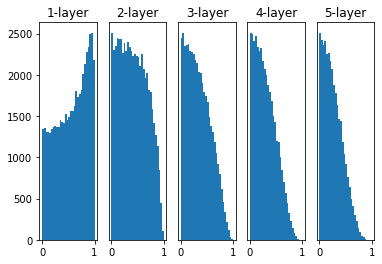

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Xavier 초깃값은 활성화 함수가 선형인 것을 전제  
sigmoid 함수와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있음  
따라서 Xavier 초깃값이 적당함

### ReLU를 사용할 때의 가중치 초깃값

He 초깃값 : ReLU에 특화된 초깃값  
앞 계층의 노드가 n개일 때, 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포를 사용  
ReLU는 음의 영역이 0이라서 더 넑게 분포시키기 위해 2배의 계수가 필요하다고 해석할 수 있음

##### 1. 표준편차 0.01인 정규분포를 가중치 초깃값으로 사용한 경우

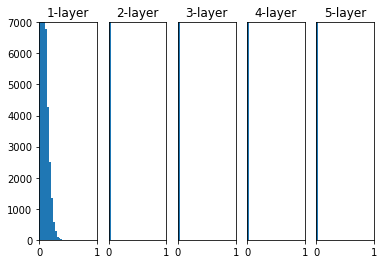

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

std = 0.01일 때의 각 층의 활성화값들은 아주 작은 값들  
신경망에서 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻  
이렇게 되면 학습이 거의 이뤄지지 않음

##### Xavier 초깃값

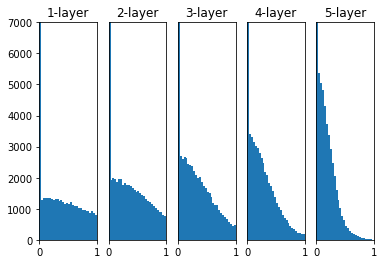

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험
#     w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

층이 깊어지면서 치우침이 조금씩 커짐  
학습할 때 '기울기 소실' 문제를 일으킴

##### He 초깃값

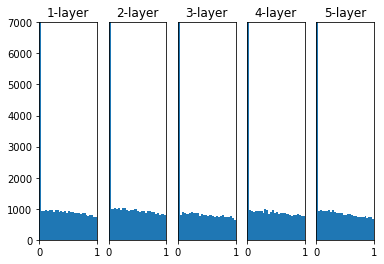

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return np.maximum(0, x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

모든 층에서 균일하게 분포됨  
층이 깊어져도 분포가 균일하게 유지되므로 역전파 때도 적절한 값이 나올 것으로 기대할 수 있음

### MNIST 데이터셋으로 본 가중치 초깃값 비교

각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용함  

===========iteration:0===========
std=0.01:2.3025164050759424
Xavier:2.3036953581496866
He:2.3245692897849572
===========iteration:100===========
std=0.01:2.3025624509836993
Xavier:2.2379758306213997
He:1.5971427819999429
===========iteration:200===========
std=0.01:2.3028548116620997
Xavier:2.1557207432340304
He:0.7805131220045161
===========iteration:300===========
std=0.01:2.3028381516500773
Xavier:1.9702535499788292
He:0.5499567400341383
===========iteration:400===========
std=0.01:2.3001014036442653
Xavier:1.3748353825059731
He:0.37340223841064757
===========iteration:500===========
std=0.01:2.3034681226209317
Xavier:1.0525006875905951
He:0.38557786090431156
===========iteration:600===========
std=0.01:2.301707086235911
Xavier:0.7216526946591626
He:0.3436695590565375
===========iteration:700===========
std=0.01:2.3030671198282655
Xavier:0.5449356361007495
He:0.29392632073597574
===========iteration:800===========
std=0.01:2.3006837125593167
Xavier:0.44629265208711916
He:0.19752476

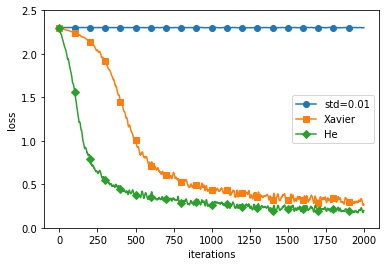

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

std=0.01일 때는 학습이 전혀 이뤄지지 않음  
앞서 활성화값의 분포에서 본 것처럼 순전파 때 너무 작은 값(0 근처로 밀집한 데이터)가 흘러 역전파 때의 기울기도 작아져 가중치가 거의 갱신되지 않음  
  
Xavier와 He 초깃값의 경우 학습이 순조롭게 이뤄짐  
학습진도는 He 초깃값이 더 빠름

### 배치 정규화

배치정규화 : 각 층에서의 활성화값이 적당히 분포되도록 조정  
데이터 분포를 정규화하는 '배치 정규화 계층'을 신경망에 삽입  
  
학습 시 미니배치를 단위로 정규화함  
데이터 분포가 평균이 0, 분산이 1이 되도록 정규화  
  
$\mu_B\leftarrow \frac{1}{m}\sum_{i=1}^{m}x_i$  

$\sigma_B^2\leftarrow \frac{1}{m}\sum_{i=1}^{m}(x_i-\mu_B)^2$  

$\hat x_i\leftarrow \frac{x_i-\mu_B}{\sqrt{\sigma_B^2+\epsilon}}$  
  
미니배치 $B=\{x_1, x_2, ..., x_n\}$이라는 m개의 입력 데이터 집합에 대해 평균 $\mu_B$와 분산 $\sigma^2_B$을 구함  
입력 데이터를 평균이 0, 분산이 1이 되게 정규화  
$\epsilon$은 작은 값(10e-7등)으로, 0으로 나누는 사태를 예방하는 역할을 함

이러한 처리를 활성화 함수의 앞(혹은 뒤)에 삽입하여 데이터 분포가 덜 치우치게 할 수 있음

또, 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대와 이동변환을 수행함  
  
$y_i\leftarrow \gamma\hat x_i+\beta$  
  
- $\gamma$ : 확대를 담당
- $\beta$ : 이동을 담당  
  
$\gamma=1, \beta=0$부터 시작하고, 학습하면서 적합한 값으로 조정됨  
($\gamma=1$은 1배 확대, $\beta=0$은 이동하지 않음을 뜻함. 즉, 처음에는 원본 그대로에서 시작한다는 의미)  

### MNIST 데이터셋으로 본 배치정규화의 효과

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


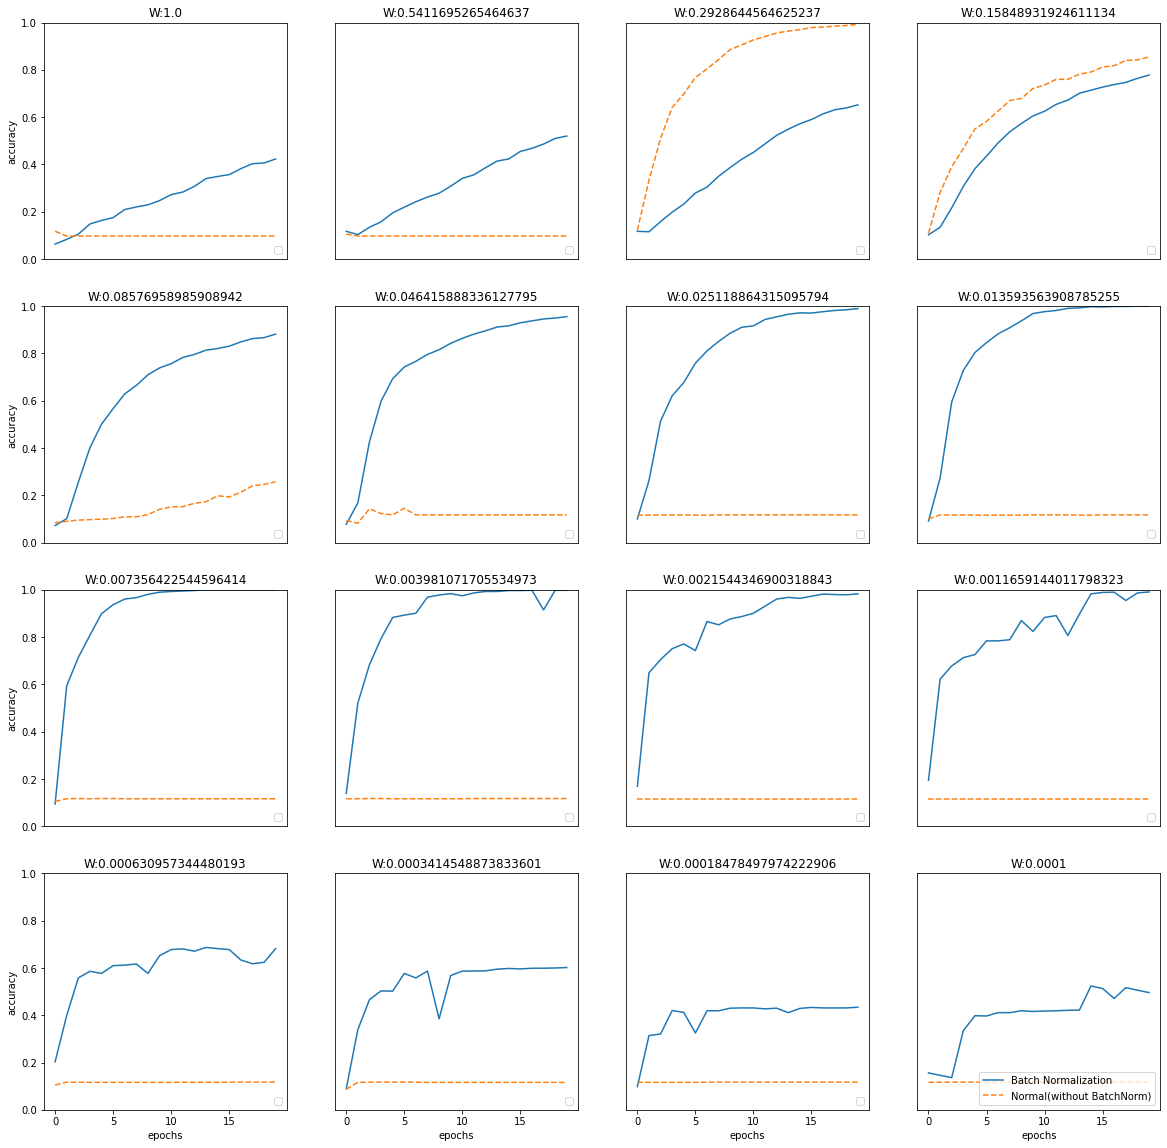

In [15]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
#             print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(20,20))

for i, w in enumerate(weight_scale_list):
#     print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

실선이 배치정규화를 사용한 경우, 점선이 사용하지 않은 경우  
가중치 초깃값의 표준편차는 각 그래프 위에 표기  
  
거의 모든 경우에서 배치 정규화를 사용할 때의 학습 진도가 빠른 것으로 나타남  
배치 정규화를 사용하면 학습이 빨라지며, 가중치 초깃값에 크게 의존하지 않아도 됨

### 오버피팅

오버피팅 : 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태  
  
오버피팅은 주로 다음의 두 경우에 일어남  
- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적음

ex)  
위 두 요건을 일부로 충족하여 오버피팅을 일으킴  
본래 60,000개인 MNIST 데이터셋의 훈련 데이터 중 300개만 사용하고,  
7층 네트워크를 사용하여 네트워크의 복잡성을 높임  
(각 층의 뉴런은 100개, 활성화 함수는 ReLU를 사용)

epoch:0, train acc:0.17666666666666667, test acc:0.1562
epoch:1, train acc:0.21333333333333335, test acc:0.1981
epoch:2, train acc:0.25333333333333335, test acc:0.2263
epoch:3, train acc:0.2733333333333333, test acc:0.2512
epoch:4, train acc:0.31, test acc:0.2631
epoch:5, train acc:0.3433333333333333, test acc:0.2736
epoch:6, train acc:0.35, test acc:0.2778
epoch:7, train acc:0.36333333333333334, test acc:0.2924
epoch:8, train acc:0.38333333333333336, test acc:0.2936
epoch:9, train acc:0.37333333333333335, test acc:0.2848
epoch:10, train acc:0.3933333333333333, test acc:0.2942
epoch:11, train acc:0.38666666666666666, test acc:0.3004
epoch:12, train acc:0.4, test acc:0.3067
epoch:13, train acc:0.42, test acc:0.3152
epoch:14, train acc:0.44333333333333336, test acc:0.325
epoch:15, train acc:0.44666666666666666, test acc:0.328
epoch:16, train acc:0.47333333333333333, test acc:0.3446
epoch:17, train acc:0.5133333333333333, test acc:0.3698
epoch:18, train acc:0.5233333333333333, test acc:0.

epoch:170, train acc:1.0, test acc:0.7541
epoch:171, train acc:1.0, test acc:0.7529
epoch:172, train acc:1.0, test acc:0.7533
epoch:173, train acc:1.0, test acc:0.7527
epoch:174, train acc:1.0, test acc:0.7538
epoch:175, train acc:1.0, test acc:0.7532
epoch:176, train acc:1.0, test acc:0.7534
epoch:177, train acc:1.0, test acc:0.754
epoch:178, train acc:1.0, test acc:0.7538
epoch:179, train acc:1.0, test acc:0.7552
epoch:180, train acc:1.0, test acc:0.7544
epoch:181, train acc:1.0, test acc:0.7547
epoch:182, train acc:1.0, test acc:0.7543
epoch:183, train acc:1.0, test acc:0.7535
epoch:184, train acc:1.0, test acc:0.7542
epoch:185, train acc:1.0, test acc:0.753
epoch:186, train acc:1.0, test acc:0.7535
epoch:187, train acc:1.0, test acc:0.7538
epoch:188, train acc:1.0, test acc:0.7542
epoch:189, train acc:1.0, test acc:0.755
epoch:190, train acc:1.0, test acc:0.7566
epoch:191, train acc:1.0, test acc:0.7547
epoch:192, train acc:1.0, test acc:0.7553
epoch:193, train acc:1.0, test acc:0.

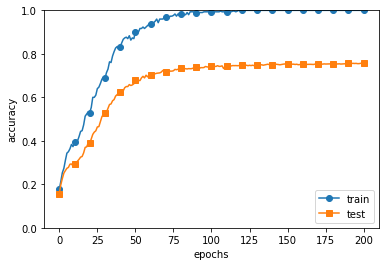

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터와 시험 데이터의 정확도가 크게 벌어지는 것은 훈련 데이터에만 적응(fitting)해버린 결과(오버피팅)

### 가중치 감소

가중치 감소(weight decay) : 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법

- L2노름 : 가중치의 제곱 노름(norm) 

    가중치 $W=(w_1, w_2, \cdots, w_n)$이 있다면,  
    L2 노름에서는 $\sqrt{w_1^2+w_2^2+\cdots+w_n^2}$으로 계산
    L2노름에 따른 가중치 감소는 $\frac{1}{2}\lambda W^2$  
    가중치 감소는 모든 가중치의 각각 손실 함수에 $\frac{1}{2}\lambda W^2$씩 더함  
    가중치의 기울기를 구하는 계산에서는 그동안의 오차역전파법에 따른 결과에 정규화 항을 미분한 $\lambda W$를 더함 
    
    * $\lambda$ : 정규화의 세기를 조절하는 하이퍼파라미터, 크게 설정할수록 큰 가중치에 대한 페널티가 커짐      
    * $\frac{1}{2}$ : $\frac{1}{2}\lambda W^2$의 미분 결과인 $\lambda W$를 조정하는 역할의 상수   
    

  
- L1노름 : 절대값의 합  
    
    $|w_1|+|w_2|+\cdots+|w_n|$  
      
      
- L$\infty$ 노름 : Max 노름, 각 원소의 절댓값 중 가장 큰 것에 해당

$\lambda=0.1$로 가중치 감소를 적용하여 실행

epoch:0, train acc:0.07333333333333333, test acc:0.0896
epoch:1, train acc:0.07333333333333333, test acc:0.0912
epoch:2, train acc:0.07666666666666666, test acc:0.0936
epoch:3, train acc:0.09, test acc:0.1021
epoch:4, train acc:0.10666666666666667, test acc:0.1089
epoch:5, train acc:0.11333333333333333, test acc:0.1209
epoch:6, train acc:0.13666666666666666, test acc:0.1372
epoch:7, train acc:0.15666666666666668, test acc:0.1477
epoch:8, train acc:0.19, test acc:0.1667
epoch:9, train acc:0.22666666666666666, test acc:0.183
epoch:10, train acc:0.24666666666666667, test acc:0.2121
epoch:11, train acc:0.27, test acc:0.2219
epoch:12, train acc:0.2966666666666667, test acc:0.2355
epoch:13, train acc:0.33666666666666667, test acc:0.2613
epoch:14, train acc:0.36333333333333334, test acc:0.2827
epoch:15, train acc:0.37666666666666665, test acc:0.29
epoch:16, train acc:0.39666666666666667, test acc:0.3027
epoch:17, train acc:0.41, test acc:0.3109
epoch:18, train acc:0.43666666666666665, test ac

epoch:162, train acc:0.84, test acc:0.6986
epoch:163, train acc:0.85, test acc:0.7039
epoch:164, train acc:0.8466666666666667, test acc:0.7033
epoch:165, train acc:0.86, test acc:0.7115
epoch:166, train acc:0.8466666666666667, test acc:0.7086
epoch:167, train acc:0.8466666666666667, test acc:0.7035
epoch:168, train acc:0.8466666666666667, test acc:0.703
epoch:169, train acc:0.85, test acc:0.7015
epoch:170, train acc:0.8433333333333334, test acc:0.7019
epoch:171, train acc:0.8466666666666667, test acc:0.7075
epoch:172, train acc:0.8566666666666667, test acc:0.704
epoch:173, train acc:0.8566666666666667, test acc:0.7065
epoch:174, train acc:0.8666666666666667, test acc:0.711
epoch:175, train acc:0.86, test acc:0.712
epoch:176, train acc:0.86, test acc:0.7161
epoch:177, train acc:0.86, test acc:0.7177
epoch:178, train acc:0.87, test acc:0.7151
epoch:179, train acc:0.85, test acc:0.7022
epoch:180, train acc:0.8533333333333334, test acc:0.7143
epoch:181, train acc:0.8533333333333334, test a

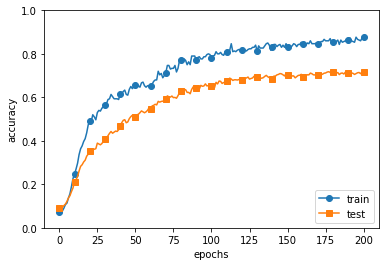

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 ========================
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

여전히 훈련 데이터와 시험 데이터의 정확도에는 차이가 있지만, 가중치 감소를 적용하지 않았을 때와 비교하면 그 차이가 줄었음  
즉, 오버피팅이 다소 억제됨  
  
훈련 데이터의 정확도가 100%(1.0)에 도달하지 않음 점도 주목해야 함

### 드롭아웃

신경망 모델이 복잡해지면 가중치 감소만으로는 오버피팅에 대응하기 어려워짐  
이럴 때는 흔히 드롭아웃(Dropout)이라는 기법을 이용  
  
드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법  
- 훈련 때는 은닉층의 뉴런을 무작위로 골라 삭제하며, 삭제된 뉴런은 신호를 전달하지 않음  
- 시험 때는 모든 뉴런에 신호를 전달. 시험 때는 각 뉴런에 훈련 때 삭제 안 한 비율을 곱하여 출력

<img src='./img/Dropout_1.png' width=500>

순전파를 담당하는 forward 메서드에서는 훈련 때(train_flg = True일 때)만 잘 계산해두면 시험 때는 단순히 데이터를 흘리기만 하고 삭제 안 한 비율은 곱하지 않아도 됨  
실제 딥러닝 프레임워크들도 비율을 곱하지 않음

In [18]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x, train_fig=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 False로 표시  
self.mask는 x와 형상이 같은 배열을 무작위로 생성하고, 그 값이 dropout_ratio보다 큰 원소만 True로 설정  
  
순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고,  
순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단함

### MNIST 데이터셋으로 Dropout 효과 비교

##### Dropout 적용 안함

train loss:2.3785213241024223
=== epoch:1, train acc:0.08666666666666667, test acc:0.1047 ===
train loss:2.398297344794154
train loss:2.302021547288462
train loss:2.3584907229084844
=== epoch:2, train acc:0.08666666666666667, test acc:0.1058 ===
train loss:2.3098262627878303
train loss:2.3106416741110833
train loss:2.320586234522557
=== epoch:3, train acc:0.09, test acc:0.1081 ===
train loss:2.2918179191676957
train loss:2.2235428265430066
train loss:2.276278056945088
=== epoch:4, train acc:0.09333333333333334, test acc:0.1122 ===
train loss:2.2605311875484775
train loss:2.232464310168409
train loss:2.256519834477298
=== epoch:5, train acc:0.1, test acc:0.1169 ===
train loss:2.2568025682759107
train loss:2.252064789685835
train loss:2.205458789695162
=== epoch:6, train acc:0.11333333333333333, test acc:0.1177 ===
train loss:2.218185111131844
train loss:2.1951876244470245
train loss:2.2368493651999235
=== epoch:7, train acc:0.13333333333333333, test acc:0.122 ===
train loss:2.1464554886

train loss:0.5704688487337837
train loss:0.5728244213444391
=== epoch:57, train acc:0.8333333333333334, test acc:0.6531 ===
train loss:0.5482445003111756
train loss:0.5744384416314376
train loss:0.6013775304425794
=== epoch:58, train acc:0.86, test acc:0.6653 ===
train loss:0.6422293313828612
train loss:0.5042134501284931
train loss:0.6343010341268475
=== epoch:59, train acc:0.87, test acc:0.667 ===
train loss:0.5085785958678689
train loss:0.5036218711981486
train loss:0.4410274863872936
=== epoch:60, train acc:0.86, test acc:0.6684 ===
train loss:0.5785930389911684
train loss:0.4854606498146898
train loss:0.49030670126454956
=== epoch:61, train acc:0.87, test acc:0.6723 ===
train loss:0.5390208860424733
train loss:0.49640926023804105
train loss:0.3366698985063301
=== epoch:62, train acc:0.8633333333333333, test acc:0.6788 ===
train loss:0.4833756757527066
train loss:0.47247621171855897
train loss:0.5619126610499903
=== epoch:63, train acc:0.8766666666666667, test acc:0.6745 ===
train 

=== epoch:112, train acc:0.9833333333333333, test acc:0.7359 ===
train loss:0.10005299778512974
train loss:0.13827035939287824
train loss:0.11842572772209257
=== epoch:113, train acc:0.9833333333333333, test acc:0.7425 ===
train loss:0.11183379242617722
train loss:0.11846692909097278
train loss:0.11250297832256914
=== epoch:114, train acc:0.99, test acc:0.7407 ===
train loss:0.12348496201831578
train loss:0.11207419751899797
train loss:0.08476990987876887
=== epoch:115, train acc:0.99, test acc:0.7402 ===
train loss:0.1315099123442813
train loss:0.13012351910497066
train loss:0.10418967811823927
=== epoch:116, train acc:0.9866666666666667, test acc:0.7417 ===
train loss:0.11287666031720388
train loss:0.1335540366553131
train loss:0.0790467653214811
=== epoch:117, train acc:0.99, test acc:0.741 ===
train loss:0.08528701818534183
train loss:0.12080650969339653
train loss:0.1106881506603248
=== epoch:118, train acc:0.9866666666666667, test acc:0.7409 ===
train loss:0.11489414302733295
tra

train loss:0.04725307464933674
train loss:0.03943884190348718
train loss:0.027186322964716507
=== epoch:169, train acc:1.0, test acc:0.7518 ===
train loss:0.05628624067379805
train loss:0.03531341940333139
train loss:0.03499567635426269
=== epoch:170, train acc:1.0, test acc:0.751 ===
train loss:0.037659662653689696
train loss:0.04982703320052916
train loss:0.03741313354283775
=== epoch:171, train acc:1.0, test acc:0.7515 ===
train loss:0.03655980458148381
train loss:0.020673933156559278
train loss:0.04783216815066781
=== epoch:172, train acc:1.0, test acc:0.7521 ===
train loss:0.04603973808916148
train loss:0.03816520895291475
train loss:0.04684932546324861
=== epoch:173, train acc:1.0, test acc:0.753 ===
train loss:0.048324831341116786
train loss:0.024682306573913203
train loss:0.04416794301359218
=== epoch:174, train acc:1.0, test acc:0.7528 ===
train loss:0.03892861309272099
train loss:0.05668363266755416
train loss:0.042624700814184076
=== epoch:175, train acc:1.0, test acc:0.7508

=== epoch:226, train acc:1.0, test acc:0.7574 ===
train loss:0.01810363328728263
train loss:0.02128277986517023
train loss:0.020559873256140997
=== epoch:227, train acc:1.0, test acc:0.757 ===
train loss:0.016587180845239493
train loss:0.019045174569761528
train loss:0.0167189110020737
=== epoch:228, train acc:1.0, test acc:0.7568 ===
train loss:0.016972931014959492
train loss:0.016441625328333744
train loss:0.0267512348391974
=== epoch:229, train acc:1.0, test acc:0.7557 ===
train loss:0.016839248552258653
train loss:0.022964687241343592
train loss:0.016721663862105503
=== epoch:230, train acc:1.0, test acc:0.7569 ===
train loss:0.019186444163490798
train loss:0.016887834799273853
train loss:0.018677500531416414
=== epoch:231, train acc:1.0, test acc:0.7561 ===
train loss:0.016714587490375746
train loss:0.014501258099431893
train loss:0.019203523549606333
=== epoch:232, train acc:1.0, test acc:0.7567 ===
train loss:0.015111629173318698
train loss:0.016222884714180423
train loss:0.0168

=== epoch:284, train acc:1.0, test acc:0.7586 ===
train loss:0.010360446064554179
train loss:0.008728531670189821
train loss:0.008945071686164274
=== epoch:285, train acc:1.0, test acc:0.7585 ===
train loss:0.0073722265578844435
train loss:0.010934038523408596
train loss:0.012513585065097359
=== epoch:286, train acc:1.0, test acc:0.7583 ===
train loss:0.012719774160244786
train loss:0.011920363478939038
train loss:0.012887032365195934
=== epoch:287, train acc:1.0, test acc:0.7578 ===
train loss:0.009267397589524358
train loss:0.009958680213221155
train loss:0.011508637318459008
=== epoch:288, train acc:1.0, test acc:0.7579 ===
train loss:0.010396253678742876
train loss:0.01382598494672551
train loss:0.009534154105722554
=== epoch:289, train acc:1.0, test acc:0.7581 ===
train loss:0.008494043867563028
train loss:0.012035197608554496
train loss:0.014609752306804025
=== epoch:290, train acc:1.0, test acc:0.7587 ===
train loss:0.011258167194295694
train loss:0.011953640619884546
train loss

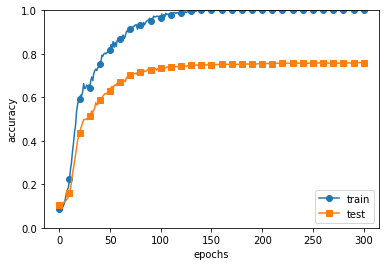

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = False  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

##### Dropout 적용함

train loss:2.289708199411346
=== epoch:1, train acc:0.11, test acc:0.1297 ===
train loss:2.283767021727264
train loss:2.3139981743511475
train loss:2.2858987065316816
=== epoch:2, train acc:0.13333333333333333, test acc:0.1365 ===
train loss:2.30939961919045
train loss:2.285709978839803
train loss:2.2962928377249914
=== epoch:3, train acc:0.14, test acc:0.1425 ===
train loss:2.2955257442699586
train loss:2.306501665041415
train loss:2.3002473794274687
=== epoch:4, train acc:0.14333333333333334, test acc:0.1463 ===
train loss:2.302729459038105
train loss:2.300622610002559
train loss:2.309819085707694
=== epoch:5, train acc:0.15, test acc:0.15 ===
train loss:2.2968036141310204
train loss:2.308101852039193
train loss:2.3177912185455867
=== epoch:6, train acc:0.15666666666666668, test acc:0.1546 ===
train loss:2.30014563250825
train loss:2.2918601891342725
train loss:2.302757991280012
=== epoch:7, train acc:0.16, test acc:0.1583 ===
train loss:2.311046109396528
train loss:2.303490801114053

=== epoch:56, train acc:0.23666666666666666, test acc:0.2057 ===
train loss:2.195885738186692
train loss:2.2136465764666706
train loss:2.2454802336022883
=== epoch:57, train acc:0.24, test acc:0.2063 ===
train loss:2.227646183874721
train loss:2.2056601046885325
train loss:2.2268515391818853
=== epoch:58, train acc:0.24, test acc:0.2069 ===
train loss:2.2389644035830596
train loss:2.239855078094413
train loss:2.2482626136112867
=== epoch:59, train acc:0.24333333333333335, test acc:0.2079 ===
train loss:2.212052368038565
train loss:2.1913876594226793
train loss:2.2098829146509904
=== epoch:60, train acc:0.24333333333333335, test acc:0.2086 ===
train loss:2.204478849728903
train loss:2.2133763907888824
train loss:2.2172590698990033
=== epoch:61, train acc:0.24, test acc:0.2083 ===
train loss:2.232734310079422
train loss:2.248519248015879
train loss:2.204691641250628
=== epoch:62, train acc:0.23666666666666666, test acc:0.2086 ===
train loss:2.2084765721689674
train loss:2.216770626728360

=== epoch:113, train acc:0.2633333333333333, test acc:0.2176 ===
train loss:2.076541507976878
train loss:2.0640844657964426
train loss:2.0589066533576066
=== epoch:114, train acc:0.26666666666666666, test acc:0.2177 ===
train loss:2.0712550267151544
train loss:1.9839755413759037
train loss:2.0455533951000016
=== epoch:115, train acc:0.26666666666666666, test acc:0.2165 ===
train loss:2.150254898253256
train loss:1.9833081315136214
train loss:2.1394660792234017
=== epoch:116, train acc:0.26666666666666666, test acc:0.2169 ===
train loss:1.966635653595958
train loss:2.039846308386786
train loss:2.107059646962762
=== epoch:117, train acc:0.26666666666666666, test acc:0.2165 ===
train loss:2.1085819991478276
train loss:2.1150215984574245
train loss:2.1094679616051266
=== epoch:118, train acc:0.26666666666666666, test acc:0.2173 ===
train loss:2.0943397155004195
train loss:2.1677749763281424
train loss:2.117846546199762
=== epoch:119, train acc:0.2733333333333333, test acc:0.2193 ===
train 

=== epoch:168, train acc:0.2833333333333333, test acc:0.2336 ===
train loss:1.8596044939566192
train loss:1.8612029713998277
train loss:1.8661024346077897
=== epoch:169, train acc:0.28, test acc:0.2333 ===
train loss:1.932074090724088
train loss:2.0150053765183307
train loss:1.9303678351316123
=== epoch:170, train acc:0.29, test acc:0.2362 ===
train loss:1.899715856329131
train loss:1.8754293755425753
train loss:1.9508863750416996
=== epoch:171, train acc:0.29333333333333333, test acc:0.2366 ===
train loss:1.9500090487017372
train loss:1.9707652495474985
train loss:1.8184267159603724
=== epoch:172, train acc:0.29, test acc:0.2375 ===
train loss:1.8987279119200382
train loss:1.9620083740897099
train loss:1.8622515327835878
=== epoch:173, train acc:0.2966666666666667, test acc:0.2395 ===
train loss:1.8914684222403881
train loss:1.9419639855439497
train loss:1.9517071590175261
=== epoch:174, train acc:0.30333333333333334, test acc:0.2415 ===
train loss:1.815548952343498
train loss:1.85281

=== epoch:224, train acc:0.3933333333333333, test acc:0.3151 ===
train loss:1.8228465530033875
train loss:1.8312846114776944
train loss:1.698256241803118
=== epoch:225, train acc:0.39, test acc:0.3208 ===
train loss:1.8730712311802387
train loss:1.8197205089079538
train loss:1.648617914480713
=== epoch:226, train acc:0.39, test acc:0.3186 ===
train loss:1.737785470259494
train loss:1.8040207027091055
train loss:1.7298562531674702
=== epoch:227, train acc:0.3933333333333333, test acc:0.3199 ===
train loss:1.7547900297781625
train loss:1.673998198498982
train loss:1.8693297107648363
=== epoch:228, train acc:0.39666666666666667, test acc:0.3254 ===
train loss:1.8204598163106105
train loss:1.8357250349451877
train loss:1.6712951548779154
=== epoch:229, train acc:0.4, test acc:0.3282 ===
train loss:1.7965697135398255
train loss:1.7909436818141031
train loss:1.6985846778023772
=== epoch:230, train acc:0.39666666666666667, test acc:0.3261 ===
train loss:1.731621764211676
train loss:1.74867148

=== epoch:280, train acc:0.52, test acc:0.409 ===
train loss:1.56580450730725
train loss:1.5977307888598928
train loss:1.676095196209466
=== epoch:281, train acc:0.5233333333333333, test acc:0.4095 ===
train loss:1.5988727318499243
train loss:1.6535694002751449
train loss:1.6164641350648845
=== epoch:282, train acc:0.5266666666666666, test acc:0.4122 ===
train loss:1.7352581932208464
train loss:1.546109807720211
train loss:1.5083054956777988
=== epoch:283, train acc:0.5266666666666666, test acc:0.4133 ===
train loss:1.5888904182319712
train loss:1.6397098710236977
train loss:1.5081889374454838
=== epoch:284, train acc:0.53, test acc:0.4159 ===
train loss:1.6265263240176768
train loss:1.634282414527729
train loss:1.595823849260032
=== epoch:285, train acc:0.54, test acc:0.416 ===
train loss:1.690196866223375
train loss:1.5890555398330657
train loss:1.5567493322462957
=== epoch:286, train acc:0.5333333333333333, test acc:0.4163 ===
train loss:1.4437894162193181
train loss:1.5738523879169

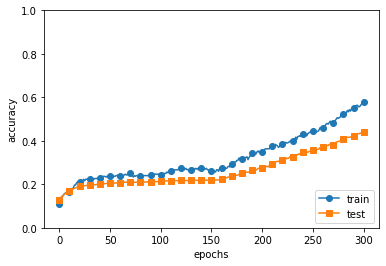

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

드롭아웃을 적용하니 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄었음  
또, 훈련 데이터에 대한 정확도가 100%에 도달하지도 않게 되었음  
드롭아웃을 이용하면 표현력을 높이면서 오버피팅을 억제할 수 있음

<참고>  
앙상블 학습 : 개별적으로 학습시킨 여러 모델의 출력을 평균(또는 voting 등의 방법) 내어 추론하는 방식  
  
신경망의 맥락에서 보면, 가령 같은 (혹은 비슷한) 구조의 네트워크를 5개 준비하여 따로따로 학습시키고, 시험 때는 그 5개의 출력을 평균 내어 답하는 것  
앙상블 학습을 수행하면 신경망의 정확도가 몇 % 정도 개선된다는 것이 실험적으로 알려져 있음  
  
앙상블 학습은 드롭아웃과 밀접함  
드롭아웃이 학습 때 뉴런을 무작위로 삭제하는 행위를 매번 다른 모델을 학습시키는 것으로 해석할 수 있기 때문  
또한, 추론 때는 뉴런의 출력에 삭제한 비율을 곱함으로써 앙상블 학습에서 여러 모델의 평균을 내는 것과 같은 효과를 얻음

### 적절한 하이퍼파라미터 값 찾기

### 검증 데이터

시험 데이터를 사용하여 하이퍼파라미터를 조정하면 하이퍼파라미터 값이 시험 데이터에 오버피팅 되어 범용 성능이 떨어지는 모델이 될 수 있음  
따라서 하이퍼파라미터 조정용 데이터인 검증 데이터(validation data)를 따로 둬야 함  
  
- 훈련 데이터 : 매개변수(가중치와 편향) 학습
- 검증 데이터 : 하이퍼파라미터 성능 평가
- 시험 데이터 : 신경망의 범용 성능 평가(이상적으로는 마지막에 한 번만 이용)

In [ ]:
def shuffle_dataset(x, t):
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]
    
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞음
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 하이퍼파라미터 최적화

하이퍼 파라미터를 최적화할 때는 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여가면서 찾아야 함  
우선 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 샘플링한 후, 그 값으로 정확도를 평가  
정확도를 살피면서 이 작업을 여러 번 반복하여 하이퍼파라미터의 최적 값의 범위를 좁혀감  
  
하이퍼파라미터의 범위는 '대략적으로' 지정하는 것이 효과적  
10의 거듭제곱 단위로 범위를 지정(로그 스케일로 지정)

<참고>  
베이즈 최적화(Bayesian optimaization)는 베이즈 정리를 중심으로 한 수학 이론을 구사하여 더 엄밀하고 효율적으로 최적화를 수행함

### MNIST 데이터셋에서 하이퍼 파라미터 최적화 구현

가중치 감소 계수 탐색  
  
하이퍼파라미터의 검증은 값을 0.001 ~ 1,000 사이 같은 로그 스케일 범위에서 무작위로 추출해 수행  
이 예에서는 가중치 감소 계수를 $10^{-8}$ ~ $10^{-4}$, 학습률을 $10^{-6}$ ~ $10^{-2}$ 범위부터 시작

val acc:0.71 | lr:0.005864602487539607, weight decay:4.1899083584961145e-08
val acc:0.11 | lr:2.9084615977867385e-05, weight decay:9.741268845271518e-07
val acc:0.06 | lr:2.3027398559433522e-05, weight decay:2.6118204696507082e-05
val acc:0.09 | lr:2.5076224696249734e-05, weight decay:3.553033984646908e-07
val acc:0.09 | lr:2.7838255512588508e-05, weight decay:1.1635713519660536e-07
val acc:0.11 | lr:3.919600147510379e-06, weight decay:1.7812403110917694e-08
val acc:0.11 | lr:1.895506644321132e-05, weight decay:4.996441713306761e-08
val acc:0.08 | lr:5.746665973673089e-06, weight decay:1.1395569761833928e-07
val acc:0.14 | lr:5.859519166786934e-05, weight decay:3.0804221925527805e-08
val acc:0.08 | lr:4.6792231541141825e-05, weight decay:1.266306762297942e-07
val acc:0.11 | lr:0.00038292973711205337, weight decay:1.3105379291856656e-07
val acc:0.09 | lr:4.355882740042675e-05, weight decay:1.3320511883340262e-08
val acc:0.14 | lr:1.678125923103302e-05, weight decay:2.5634982788177722e-0

Best-16(val acc:0.35) | lr:0.001167550541706727, weight decay:2.67688733747207e-08
Best-17(val acc:0.29) | lr:0.0017371487582225889, weight decay:7.513638353589412e-07
Best-18(val acc:0.23) | lr:0.0013462553140681525, weight decay:7.897951907832482e-08
Best-19(val acc:0.21) | lr:0.0008439524625606695, weight decay:1.1332965880881847e-07
Best-20(val acc:0.21) | lr:0.0005018109989205146, weight decay:4.847226342446826e-06


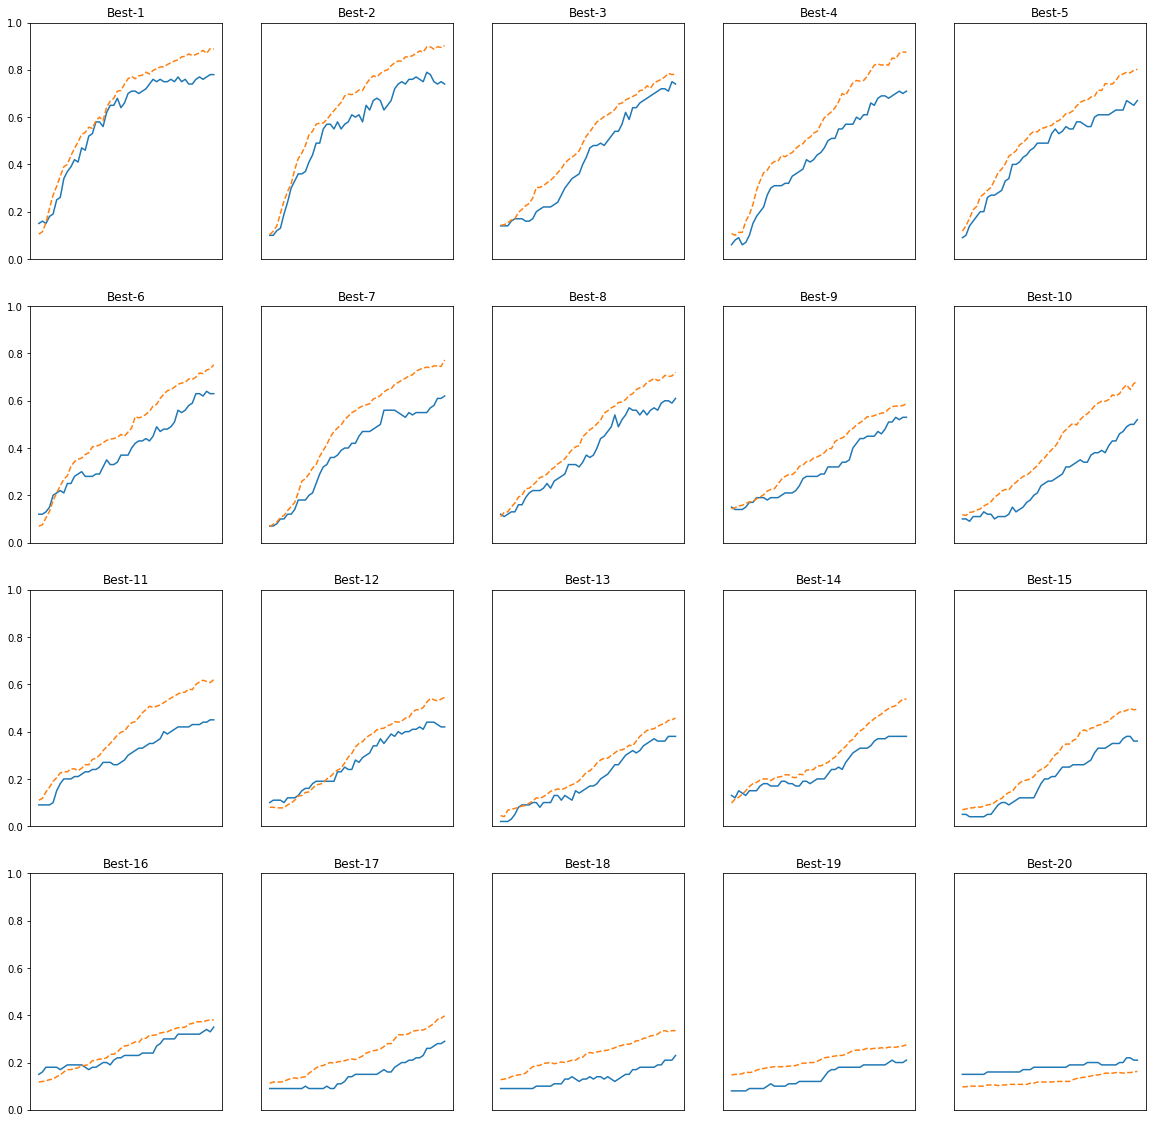

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.figure(figsize=(20,20))
for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

실선은 검증 데이터에 대한 정확도, 점선은 훈련 데이터에 대한 정확도

Best-1(val acc:0.78) | lr:0.007873093474231077, weight decay:1.2888619500676903e-06  
Best-2(val acc:0.74) | lr:0.008747070211272252, weight decay:4.617605332413332e-06  
Best-3(val acc:0.74) | lr:0.005986929901520372, weight decay:1.1699577381741538e-05  
Best-4(val acc:0.71) | lr:0.005864602487539607, weight decay:4.1899083584961145e-08  
Best-5(val acc:0.67) | lr:0.004580194819573386, weight decay:8.500152117045165e-08  

위 결과를 보면 학습이 잘 진행될 때의 학습률은 0.001 ~ 0.01,  
가중치 감소 계수는 $10^{-8}$ ~ $10^{-6}$ 정도라는 것을 알 수 있음  
  
이처럼 잘될 것 같은 값의 범위를 관찰하고 범위를 좁혀가는 작업을 반복하여 최종 하이퍼파라미터 값을 선택